<h3>What are Convolutional Neural Networks?</h3>
<p>Now you know what convolutions are. But what about CNNs? CNNs are basically just several layers of convolutions with <em>nonlinear activation functions</em> like <a href="https://en.wikipedia.org/wiki/Rectifier_(neural_networks)">ReLU</a> or <a href="https://reference.wolfram.com/language/ref/Tanh.html">tanh</a> applied to the results. In a traditional feedforward neural network we connect each input neuron to each output neuron in the next layer. That&#8217;s also called a fully connected layer, or affine layer. In CNNs we don&#8217;t do that. Instead, we use convolutions over the input layer to compute the output. This results in local connections, where each region of the input is connected to a neuron in the output. <span style="line-height: 1.5;">Each layer applies different filters, typically hundreds or thousands like the ones showed above, and combines their results. There&#8217;s also something something called pooling (subsampling) layers, but I&#8217;ll get into that later. During the training phase, </span><strong style="line-height: 1.5;">a CNN</strong> <strong style="line-height: 1.5;">automatically learns the values of its filters</strong><span style="line-height: 1.5;"> based on the task you want to perform. For example, in Image Classification a CNN may learn to detect edges from raw pixels in the first layer, then use the edges to detect simple shapes in the second layer, and then use these shapes to deter higher-level features, such as facial shapes in higher layers. The last layer is then a classifier that uses these high-level features.</span></p>
<p><a href="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png"><img class="alignnone size-large wp-image-424" src="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM-1024x279.png" alt="Convolutional Neural Network (Clarifai)" width="1024" height="279" srcset="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM-1024x279.png 1024w, http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM-300x82.png 300w, http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png 1558w" sizes="(max-width: 767px) 89vw, (max-width: 1000px) 54vw, (max-width: 1071px) 543px, 580px" /></a></p>
<p>There are two aspects of this computation worth paying attention to: <strong>Location Invariance</strong> and <strong>Compositionality</strong>. Let&#8217;s say you want to classify whether or not there&#8217;s an elephant in an image. Because you are sliding your filters over the whole image you don&#8217;t really care <em>where</em> the elephant occurs. In practice,  <em>pooling</em> also gives you invariance to translation, rotation and scaling, but more on that later. The second key aspect is (local) compositionality. Each filter <em>composes</em> a local patch of lower-level features into higher-level representation. That&#8217;s why CNNs are so powerful in Computer Vision. It makes intuitive sense that you build edges from pixels, shapes from edges, and more complex objects from shapes.</p>
<h4>So, how does any of this apply to NLP?</h4>
<p>Instead of image pixels, the input to most NLP tasks are sentences or documents represented as a matrix. Each row of the matrix corresponds to one token, typically a word, but it could be a character. That is, each row is vector that represents a word. Typically, these vectors are <em>word embeddings</em> (low-dimensional representations) like <a href="https://code.google.com/p/word2vec/">word2vec</a> or <a href="http://nlp.stanford.edu/projects/glove/">GloVe</a>, but they could also be one-hot vectors that index the word into a vocabulary. For a 10 word sentence using a 100-dimensional embedding we would have a 10&#215;100 matrix as our input. That&#8217;s our &#8220;image&#8221;.</p>
<p>In vision, our filters slide over local patches of an image, but in NLP we typically use filters that slide over full rows of the matrix (words). Thus, the &#8220;width&#8221; of our filters is usually the same as the width of the input matrix. The height, or <em>region size</em>, may vary, but sliding windows over 2-5 words at a time is typical. Putting all the above together, a Convolutional Neural Network for NLP may look like this (take a few minutes and try understand this picture and how the dimensions are computed. You can ignore the pooling for now, we&#8217;ll explain that later):</p>
<figure id="attachment_420" style="max-width: 1024px" class="wp-caption alignnone"><a href="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-12.05.40-PM.png"><img class="size-large wp-image-420" src="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-12.05.40-PM-1024x937.png" alt="Illustration of a Convolutional Neural Network (CNN) architecture for sentence classification. Here we depict three filter region sizes: 2, 3 and 4, each of which has 2 filters. Every filter performs convolution on the sentence matrix and generates (variable-length) feature maps. Then 1-max pooling is performed over each map, i.e., the largest number from each feature map is recorded. Thus a univariate feature vector is generated from all six maps, and these 6 features are concatenated to form a feature vector for the penultimate layer. The final softmax layer then receives this feature vector as input and uses it to classify the sentence; here we assume binary classification and hence depict two possible output states. Source: hang, Y., &amp; Wallace, B. (2015). A Sensitivity Analysis of (and Practitioners’ Guide to) Convolutional Neural Networks for Sentence Classification" width="1024" height="937" srcset="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-12.05.40-PM-1024x937.png 1024w, http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-12.05.40-PM-300x274.png 300w, http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-12.05.40-PM.png 1504w" sizes="(max-width: 767px) 89vw, (max-width: 1000px) 54vw, (max-width: 1071px) 543px, 580px" /></a><figcaption class="wp-caption-text">Illustration of a Convolutional Neural Network (CNN) architecture for sentence classification. Here we depict three filter region sizes: 2, 3 and 4, each of which has 2 filters. Every filter performs convolution on the sentence matrix and generates (variable-length) feature maps. Then 1-max pooling is performed over each map, i.e., the largest number from each feature map is recorded. Thus a univariate feature vector is generated from all six maps, and these 6 features are concatenated to form a feature vector for the penultimate layer. The final softmax layer then receives this feature vector as input and uses it to classify the sentence; here we assume binary classification and hence depict two possible output states. Source: Zhang, Y., &amp; Wallace, B. (2015). A Sensitivity Analysis of (and Practitioners’ Guide to) Convolutional Neural Networks for Sentence Classification.</figcaption></figure>
<p>What about the nice intuitions we had for Computer Vision? Location Invariance and local Compositionality made intuitive sense for images, but not so much for NLP. You probably do care a lot where in the sentence a word appears. Pixels close to each other are likely to be semantically related (part of the same object), but the same isn&#8217;t always true for words. In many languages, parts of phrases could be separated by several other words. The compositional aspect isn&#8217;t obvious either. Clearly, words compose in some ways, like an adjective modifying a noun, but how exactly this works what higher level representations actually &#8220;mean&#8221; isn&#8217;t as obvious as in the Computer Vision case.</p>

<p>Given all this, it seems like CNNs wouldn&#8217;t be a good fit for NLP tasks. <a href="http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/">Recurrent Neural Networks</a> make more intuitive sense. They resemble how we process language (or at least how we think we process language): Reading sequentially from left to right. Fortunately, this doesn&#8217;t mean that CNNs don&#8217;t work.  <a href="https://en.wikipedia.org/wiki/All_models_are_wrong">All models are wrong, but some are useful</a>. It turns out that CNNs applied to NLP problems perform quite well. The simple <a href="https://en.wikipedia.org/wiki/Bag-of-words_model">Bag of Words model</a> is an obvious oversimplification with incorrect assumptions, but has nonetheless been the standard approach for years and lead to pretty good results.</p>
<p><span style="line-height: 1.5;">A big argument for CNNs is that they are fast. Very fast. Convolutions are a central part of computer graphics and implemented on a hardware level on GPUs. Compared to something like <a href="https://en.wikipedia.org/wiki/N-gram">n-grams</a>, CNNs are also <em>efficient</em> in terms of representation. With a large vocabulary, computing anything more than 3-grams can quickly become expensive. Even Google doesn&#8217;t provide anything beyond 5-grams. Convolutional Filters learn good representations automatically, without needing to represent the whole vocabulary. It&#8217;s completely reasonable to have filters of size larger than 5. I like to think that many of the learned filters in the first layer are capturing features quite similar (but not limited) to n-grams, but represent them in a more compact way.</span></p>
<h3>CNN Hyperparameters</h3>
<p>Before explaining at how CNNs are applied to NLP tasks, let&#8217;s look at some of the choices you need to make when building a CNN. Hopefully this will help you better understand the literature in the field.</p>
<h4>Narrow vs. Wide convolution</h4>
<p>When I explained convolutions above I neglected a little detail of how we apply the filter. Applying a 3&#215;3 filter at the center of the matrix works fine, but what about the edges? How would you apply the filter to the first element of a matrix that doesn&#8217;t have any neighboring elements to the top and left? You can use <em>zero-padding</em>. All elements that would fall outside of the matrix are taken to be zero. By doing this you can apply the filter to every element of your input matrix, and get a larger or equally sized output. Adding zero-padding is also called <em>wide convolution</em><strong>,</strong> and not using zero-padding would be a<em> narrow convolution</em>. An example in 1D looks like this:</p>

<figure id="attachment_407" style="max-width: 1024px" class="wp-caption alignnone"><a href="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-9.47.41-AM.png"><img class="wp-image-407 size-large" src="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-9.47.41-AM-1024x261.png" alt="Narrow vs. Wide Convolution. Source: A Convolutional Neural Network for Modelling Sentences (2014)" width="1024" height="261" srcset="http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-9.47.41-AM-1024x261.png 1024w, http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-9.47.41-AM-300x77.png 300w, http://www.wildml.com/wp-content/uploads/2015/11/Screen-Shot-2015-11-05-at-9.47.41-AM.png 1536w" sizes="(max-width: 767px) 89vw, (max-width: 1000px) 54vw, (max-width: 1071px) 543px, 580px" /></a><figcaption class="wp-caption-text">Narrow vs. Wide Convolution. Filter size 5, input size 7. Source: A Convolutional Neural Network for Modelling Sentences (2014)</figcaption></figure>
<p>You can see how wide convolution is useful, or even necessary, when you have a large filter relative to the input size. In the above, the narrow convolution yields  an output of size <img src="//s0.wp.com/latex.php?latex=%287-5%29+%2B+1%3D3&#038;bg=ffffff&#038;fg=000&#038;s=0" alt="(7-5) + 1=3" title="(7-5) + 1=3" class="latex" />, and a wide convolution an output of size <img src="//s0.wp.com/latex.php?latex=%287%2B2%2A4+-+5%29+%2B+1+%3D11&#038;bg=ffffff&#038;fg=000&#038;s=0" alt="(7+2*4 - 5) + 1 =11" title="(7+2*4 - 5) + 1 =11" class="latex" />. More generally, the formula for the output size is <img src="//s0.wp.com/latex.php?latex=n_%7Bout%7D%3D%28n_%7Bin%7D+%2B+2%2An_%7Bpadding%7D+-+n_%7Bfilter%7D%29+%2B+1+&#038;bg=ffffff&#038;fg=000&#038;s=0" alt="n_{out}=(n_{in} + 2*n_{padding} - n_{filter}) + 1 " title="n_{out}=(n_{in} + 2*n_{padding} - n_{filter}) + 1 " class="latex" />.</p>

## Filters

At the core of CNNs are filters (weights, kernels, etc.) which convolve (slide) across our input to extract relevant features. The filters are initialized randomly but learn to pick up meaningful features from the input that aid in optimizing for the objective. We're going to teach CNNs in an unorthodox method where we entirely focus on applying it to 2D text data. Each input is composed of words and we will be representing each word as one-hot encoded vector which gives us our 2D input. The intuition here is that each filter represents a feature and we will use this filter on other inputs to capture the same feature. This is known as parameter sharing.

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/conv.gif" width=400>

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

Our inputs are a batch of 2D text data. Let's make an input with 64 samples, where each sample has 8 words and each word is represented by a array of 10 values (one hot encoded with vocab size of 10). This gives our inputs the size (64, 8, 10). The [PyTorch CNN modules](https://pytorch.org/docs/stable/nn.html#convolution-functions) prefer inputs to have the channel dim (one hot vector dim in our case) to be in the second position, so our inputs are of shape (64, 10, 8).

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/cnn_text1.png" width=400>

In [3]:
# Assume all our inputs have the same # of words
batch_size = 64
sequence_size = 8 # words per input
one_hot_size = 10 # vocab size (num_input_channels)
x = torch.randn(batch_size, one_hot_size, sequence_size)
print("Size: {}".format(x.shape))

Size: torch.Size([64, 10, 8])


We want to convolve on this input using filters. For simplicity we will use just 5 filters that is of size (1, 2) and has the same depth as the number of channels (one_hot_size). This gives our filter a shape of (5, 2, 10) but recall that PyTorch CNN modules prefer to have the channel dim (one hot vector dim in our case) to be in the second position so the filter is of shape (5, 10, 2).

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/cnn_text2.png" width=400>

In [10]:
# Create filters for a conv layer
out_channels = 5 # of filters
kernel_size = 2 # filters size 2
conv1 = nn.Conv1d(in_channels=one_hot_size, out_channels=out_channels, kernel_size=kernel_size)
print("Size: {}".format(conv1.weight.shape))
print("Filter size: {}".format(conv1.kernel_size[0]))
print("Padding: {}".format(conv1.padding[0]))
print("Stride: {}".format(conv1.stride[0]))

Size: torch.Size([5, 10, 2])
Filter size: 2
Padding: 0
Stride: 1


When we apply this filter on our inputs, we receive an output of shape (64, 5, 7). We get 64 for the batch size, 5 for the channel dim because we used 5 filters and 7 for the conv outputs because:

$\frac{W - F + 2P}{S} + 1 = \frac{8 - 2 + 2(0)}{1} + 1 = 7$

where:
  * W: width of each input
  * F: filter size
  * P: padding
  * S: stride
    
<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/cnn_text3.png" width=400>

In [5]:
# Convolve using filters
conv_output = conv1(x)
print("Size: {}".format(conv_output.shape))

Size: torch.Size([64, 5, 7])


## Pooling

The result of convolving filters on an input is a feature map. Due to the nature of convolution and overlaps, our feature map will have lots of redundant information. Pooling is a way to summarize a high-dimensional feature map into a lower dimensional one for simplified downstream computation. The pooling operation can be the max value, average, etc. in a certain receptive field.

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/pool.jpeg" width=450>

In [6]:
# Max pooling
kernel_size = 2
pool1 = nn.MaxPool1d(kernel_size=kernel_size, stride=2, padding=0)
pool_output = pool1(conv_output)
print("Size: {}".format(pool_output.shape))

Size: torch.Size([64, 5, 3])


$\frac{W-F}{S} + 1 = \frac{7-2}{2} + 1 =  \text{floor }(2.5) + 1 = 3$

## Implementing a CNN for Text Classification
We're going use convolutional neural networks on text data which typically involves convolving on the character level representation of the text to capture meaningful n-grams. 

You can easily use this set up for [time series](https://arxiv.org/abs/1807.10707) data or [combine it](https://arxiv.org/abs/1808.04928) with other networks. For text data, we will create filters of varying kernel sizes (1,2), (1,3), and (1,4) which act as feature selectors of varying n-gram sizes. The outputs are concated and fed into a fully-connected layer for class predictions. In our example, we will be applying 1D convolutions on letter in a word. In the [embeddings notebook](https://colab.research.google.com/github/GokuMohandas/practicalAI/blob/master/notebooks/12_Embeddings.ipynb), we will apply 1D convolutions on words in a sentence.

**Word embeddings**: capture the temporal correlations among
adjacent tokens so that similar words have similar representations. Ex. "New Jersey" is close to "NJ" is close to "Garden State", etc.

**Char embeddings**: create representations that map words at a character level. Ex. "toy" and "toys" will be close to each other.

In [26]:
import os
from argparse import Namespace
import collections
import copy
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import urllib
from torch.utils.data import Dataset, DataLoader

In [27]:
# Set Numpy and PyTorch seeds
def set_seeds(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)
        
# Creating directories
def create_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

In [28]:
# Arguments
args = Namespace(
    seed=1234,
    cuda=False,
    shuffle=True,
    data_file="names.csv",
    vectorizer_file="vectorizer.json",
    model_state_file="model.pth",
    save_dir="data",
    train_size=0.7,
    val_size=0.15,
    test_size=0.15,
    num_epochs=20,
    early_stopping_criteria=5,
    learning_rate=1e-3,
    batch_size=64,
    num_filters=100,
    dropout_p=0.1,
)

# Set seeds
set_seeds(seed=args.seed, cuda=args.cuda)

# Create save dir
create_dirs(args.save_dir)

# Expand filepaths
args.vectorizer_file = os.path.join(args.save_dir, args.vectorizer_file)
args.model_state_file = os.path.join(args.save_dir, args.model_state_file)

# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False
args.device = torch.device("cuda" if args.cuda else "cpu")
print("Using CUDA: {}".format(args.cuda))

Using CUDA: False


In [29]:
# Upload data from GitHub to notebook's local drive
url = "https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/data/surnames.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(args.data_file, 'wb') as fp:
    fp.write(html)

# Raw data
df = pd.read_csv(args.data_file, header=0)
df.head()

,surname,nationality
0,Woodford,English
1,Coté,French
2,Kore,English
3,Koury,Arabic
4,Lebzak,Russian


In [30]:
# Split by nationality
by_nationality = collections.defaultdict(list)
for _, row in df.iterrows():
    by_nationality[row.nationality].append(row.to_dict())
for nationality in by_nationality:
    print ("{0}: {1}".format(nationality, len(by_nationality[nationality])))

English: 2972
French: 229
Arabic: 1603
Russian: 2373
Japanese: 775
Chinese: 220
Italian: 600
Czech: 414
Irish: 183
German: 576
Greek: 156
Spanish: 258
Polish: 120
Dutch: 236
Vietnamese: 58
Korean: 77
Portuguese: 55
Scottish: 75


In [31]:
# Create split data
final_list = []
for _, item_list in sorted(by_nationality.items()):
    if args.shuffle:
        np.random.shuffle(item_list)
    n = len(item_list)
    n_train = int(args.train_size*n)
    n_val = int(args.val_size*n)
    n_test = int(args.test_size*n)

  # Give data point a split attribute
    for item in item_list[:n_train]:
        item['split'] = 'train'
    for item in item_list[n_train:n_train+n_val]:
        item['split'] = 'val'
    for item in item_list[n_train+n_val:]:
        item['split'] = 'test'  

    # Add to final list
    final_list.extend(item_list)

In [32]:
# df with split datasets
split_df = pd.DataFrame(final_list)
split_df["split"].value_counts()

train    7680
test     1660
val      1640
Name: split, dtype: int64

In [33]:
# Preprocessing
def preprocess_text(text):
    text = ' '.join(word.lower() for word in text.split(" "))
    text = re.sub(r"([.,!?])", r" \1 ", text)
    text = re.sub(r"[^a-zA-Z.,!?]+", r" ", text)
    return text
    
split_df.surname = split_df.surname.apply(preprocess_text)
split_df.head()

,nationality,split,surname
0,Arabic,train,bishara
1,Arabic,train,nahas
2,Arabic,train,ghanem
3,Arabic,train,tannous
4,Arabic,train,mikhail


In [34]:
class Vocabulary(object):
    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):

        # Token to index
        if token_to_idx is None:
            token_to_idx = {}
        self.token_to_idx = token_to_idx

        # Index to token
        self.idx_to_token = {idx: token \
                             for token, idx in self.token_to_idx.items()}
        
        # Add unknown token
        self.add_unk = add_unk
        self.unk_token = unk_token
        if self.add_unk:
            self.unk_index = self.add_token(self.unk_token)

    def to_serializable(self):
        return {'token_to_idx': self.token_to_idx,
                'add_unk': self.add_unk, 'unk_token': self.unk_token}

    @classmethod
    def from_serializable(cls, contents):
        return cls(**contents)

    def add_token(self, token):
        if token in self.token_to_idx:
            index = self.token_to_idx[token]
        else:
            index = len(self.token_to_idx)
            self.token_to_idx[token] = index
            self.idx_to_token[index] = token
        return index

    def add_tokens(self, tokens):
        return [self.add_token[token] for token in tokens]

    def lookup_token(self, token):
        if self.add_unk:
            index = self.token_to_idx.get(token, self.unk_index)
        else:
            index =  self.token_to_idx[token]
        return index

    def lookup_index(self, index):
        if index not in self.idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self.idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self.token_to_idx)

In [35]:
# Vocabulary instance
nationality_vocab = Vocabulary(add_unk=False)
for index, row in df.iterrows():
    nationality_vocab.add_token(row.nationality)
print (nationality_vocab) # __str__
index = nationality_vocab.lookup_token("English")
print (index)
print (nationality_vocab.lookup_index(index))

<Vocabulary(size=18)>
0
English


In [36]:
class SurnameVectorizer(object):
    def __init__(self, surname_vocab, nationality_vocab):
        self.surname_vocab = surname_vocab
        self.nationality_vocab = nationality_vocab

    def vectorize(self, surname):
        one_hot_matrix_size = (len(surname), len(self.surname_vocab))
        one_hot_matrix = np.zeros(one_hot_matrix_size, dtype=np.float32)
                               
        for position_index, character in enumerate(surname):
            character_index = self.surname_vocab.lookup_token(character)
            one_hot_matrix[position_index][character_index] = 1
        
        return one_hot_matrix
    
    def unvectorize(self, one_hot_matrix):
        len_name = len(one_hot_matrix)
        indices = np.zeros(len_name)
        for i in range(len_name):
            indices[i] = np.where(one_hot_matrix[i]==1)[0][0]
        surname = [self.surname_vocab.lookup_index(index) for index in indices]
        return surname

    @classmethod
    def from_dataframe(cls, df):
        surname_vocab = Vocabulary(add_unk=True)
        nationality_vocab = Vocabulary(add_unk=False)

        # Create vocabularies
        for index, row in df.iterrows():
            for letter in row.surname: # char-level tokenization
                surname_vocab.add_token(letter)
            nationality_vocab.add_token(row.nationality)
        return cls(surname_vocab, nationality_vocab)

    @classmethod
    def from_serializable(cls, contents):
        surname_vocab = Vocabulary.from_serializable(contents['surname_vocab'])
        nationality_vocab =  Vocabulary.from_serializable(contents['nationality_vocab'])
        return cls(surname_vocab, nationality_vocab)

    def to_serializable(self):
        return {'surname_vocab': self.surname_vocab.to_serializable(),
                'nationality_vocab': self.nationality_vocab.to_serializable()}

In [37]:
# Vectorizer instance
vectorizer = SurnameVectorizer.from_dataframe(split_df)
print (vectorizer.surname_vocab)
print (vectorizer.nationality_vocab)
vectorized_surname = vectorizer.vectorize(preprocess_text("goku"))
print (np.shape(vectorized_surname))
print (vectorized_surname)
print (vectorizer.unvectorize(vectorized_surname))

<Vocabulary(size=28)>
<Vocabulary(size=18)>
(4, 28)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
['g', 'o', 'k', 'u']


In [38]:
class SurnameDataset(Dataset):
    def __init__(self, df, vectorizer):
        self.df = df
        self.vectorizer = vectorizer

        # Data splits
        self.train_df = self.df[self.df.split=='train']
        self.train_size = len(self.train_df)
        self.val_df = self.df[self.df.split=='val']
        self.val_size = len(self.val_df)
        self.test_df = self.df[self.df.split=='test']
        self.test_size = len(self.test_df)
        self.lookup_dict = {'train': (self.train_df, self.train_size), 
                            'val': (self.val_df, self.val_size),
                            'test': (self.test_df, self.test_size)}
        self.set_split('train')

        # Class weights (for imbalances)
        class_counts = df.nationality.value_counts().to_dict()
        def sort_key(item):
            return self.vectorizer.nationality_vocab.lookup_token(item[0])
        sorted_counts = sorted(class_counts.items(), key=sort_key)
        frequencies = [count for _, count in sorted_counts]
        self.class_weights = 1.0 / torch.tensor(frequencies, dtype=torch.float32)

    @classmethod
    def load_dataset_and_make_vectorizer(cls, df):
        train_df = df[df.split=='train']
        return cls(df, SurnameVectorizer.from_dataframe(train_df))

    @classmethod
    def load_dataset_and_load_vectorizer(cls, df, vectorizer_filepath):
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(df, vectorizer)

    def load_vectorizer_only(vectorizer_filepath):
        with open(vectorizer_filepath) as fp:
            return SurnameVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self.vectorizer.to_serializable(), fp)

    def set_split(self, split="train"):
        self.target_split = split
        self.target_df, self.target_size = self.lookup_dict[split]

    def __str__(self):
        return "<Dataset(split={0}, size={1})".format(
            self.target_split, self.target_size)

    def __len__(self):
        return self.target_size

    def __getitem__(self, index):
        row = self.target_df.iloc[index]
        surname_vector = self.vectorizer.vectorize(row.surname)
        nationality_index = self.vectorizer.nationality_vocab.lookup_token(row.nationality)
        return {'surname': surname_vector, 'nationality': nationality_index}

    def get_num_batches(self, batch_size):
        return len(self) // batch_size

    def generate_batches(self, batch_size, collate_fn, shuffle=True, 
                         drop_last=True, device="cpu"):
        dataloader = DataLoader(dataset=self, batch_size=batch_size,
                                collate_fn=collate_fn, shuffle=shuffle, 
                                drop_last=drop_last)
        for data_dict in dataloader:
            out_data_dict = {}
            for name, tensor in data_dict.items():
                out_data_dict[name] = data_dict[name].to(device)
            yield out_data_dict

In [39]:
# Dataset instance
dataset = SurnameDataset.load_dataset_and_make_vectorizer(split_df)
print (dataset) # __str__
print (np.shape(dataset[5]['surname'])) # __getitem__
print (dataset.class_weights)

<Dataset(split=train, size=7680)
(6, 28)
tensor([0.0006, 0.0045, 0.0024, 0.0042, 0.0003, 0.0044, 0.0017, 0.0064, 0.0055,
        0.0017, 0.0013, 0.0130, 0.0083, 0.0182, 0.0004, 0.0133, 0.0039, 0.0172])


## Model

In [45]:
class SurnameModel(nn.Module):
    def __init__(self, num_input_channels, num_output_channels, num_classes, dropout_p):
        super(SurnameModel, self).__init__()
        
        # Conv weights
        self.conv = nn.ModuleList([nn.Conv1d(num_input_channels, num_output_channels, 
                                             kernel_size=f) for f in [2,3,4]])
        self.dropout = nn.Dropout(dropout_p)
       
        # FC weights
        self.fc1 = nn.Linear(num_output_channels*3, num_classes)

    def forward(self, x, channel_first=False, apply_softmax=False):
        
        # Rearrange input so num_input_channels is in dim 1 (N, C, L)
        if not channel_first:
            x = x.transpose(1, 2)
            
        # Conv outputs
        z = [conv(x) for conv in self.conv]
        z = [F.max_pool1d(zz, zz.size(2)).squeeze(2) for zz in z]
        z = [F.relu(zz) for zz in z]
        
        # Concat conv outputs
        z = torch.cat(z, 1)
        z = self.dropout(z)

        # FC layer
        y_pred = self.fc1(z)
        
        if apply_softmax:
            y_pred = F.softmax(y_pred, dim=1)
        return y_pred

In [51]:
# Initialization
dataset = SurnameDataset.load_dataset_and_make_vectorizer(split_df)
dataset.save_vectorizer(args.vectorizer_file)
vectorizer = dataset.vectorizer
model = SurnameModel(num_input_channels=len(vectorizer.surname_vocab),
                     num_output_channels=args.num_filters,
                     num_classes=len(vectorizer.nationality_vocab),
                     dropout_p=args.dropout_p)
print (model.named_modules)

<bound method Module.named_modules of SurnameModel(
  (conv): ModuleList(
    (0): Conv1d(28, 100, kernel_size=(2,), stride=(1,))
    (1): Conv1d(28, 100, kernel_size=(3,), stride=(1,))
    (2): Conv1d(28, 100, kernel_size=(4,), stride=(1,))
  )
  (dropout): Dropout(p=0.1)
  (fc1): Linear(in_features=300, out_features=18, bias=True)
)>


In [52]:
class Trainer(object):
    def __init__(self, dataset, model, model_state_file, save_dir, device, shuffle,
                 num_epochs, batch_size, learning_rate, early_stopping_criteria):
        self.dataset = dataset
        self.class_weights = dataset.class_weights.to(device)
        self.model = model.to(device)
        self.save_dir = save_dir
        self.device = device
        self.shuffle = shuffle
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.loss_func = nn.CrossEntropyLoss(self.class_weights)
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer=self.optimizer, mode='min', factor=0.5, patience=1)
        self.train_state = {
            'done_training': False,
            'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'early_stopping_criteria': early_stopping_criteria,
            'learning_rate': learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': model_state_file}

    def update_train_state(self):

        # Verbose
        print("[EPOCH]: {0} | [LR]: {1} | [TRAIN LOSS]: {2:.2f} | [TRAIN ACC]: {3:.1f}% | [VAL LOSS]: {4:.2f} | [VAL ACC]: {5:.1f}%".format(
            self.train_state['epoch_index'], self.train_state['learning_rate'],
            self.train_state['train_loss'][-1], self.train_state['train_acc'][-1],
            self.train_state['val_loss'][-1], self.train_state['val_acc'][-1]))

        # Save one model at least
        if self.train_state['epoch_index'] == 0:
            torch.save(self.model.state_dict(),
                       self.train_state['model_filename'])
            self.train_state['stop_early'] = False

        # Save model if performance improved
        elif self.train_state['epoch_index'] >= 1:
            loss_tm1, loss_t = self.train_state['val_loss'][-2:]

            # If loss worsened
            if loss_t >= self.train_state['early_stopping_best_val']:
                # Update step
                self.train_state['early_stopping_step'] += 1

            # Loss decreased
            else:
                # Save the best model
                if loss_t < self.train_state['early_stopping_best_val']:
                    torch.save(self.model.state_dict(),
                               self.train_state['model_filename'])

                # Reset early stopping step
                self.train_state['early_stopping_step'] = 0

            # Stop early ?
            self.train_state['stop_early'] = self.train_state['early_stopping_step'] \
                >= self.train_state['early_stopping_criteria']
        return self.train_state

    def compute_accuracy(self, y_pred, y_target):
        _, y_pred_indices = y_pred.max(dim=1)
        n_correct = torch.eq(y_pred_indices, y_target).sum().item()
        return n_correct / len(y_pred_indices) * 100

    def pad_seq(self, seq, length):
        vector = np.zeros((length, len(self.dataset.vectorizer.surname_vocab)),
                          dtype=np.int64)
        for i in range(len(seq)):
            vector[i] = seq[i]
        return vector

    def collate_fn(self, batch):

        # Make a deep copy
        batch_copy = copy.deepcopy(batch)
        processed_batch = {"surname": [], "nationality": []}

        # Get max sequence length
        max_seq_len = max([len(sample["surname"]) for sample in batch_copy])

        # Pad
        for i, sample in enumerate(batch_copy):
            seq = sample["surname"]
            nationality = sample["nationality"]
            padded_seq = self.pad_seq(seq, max_seq_len)
            processed_batch["surname"].append(padded_seq)
            processed_batch["nationality"].append(nationality)

        # Convert to appropriate tensor types
        processed_batch["surname"] = torch.FloatTensor(
            processed_batch["surname"])  # need float for conv operations
        processed_batch["nationality"] = torch.LongTensor(
            processed_batch["nationality"])

        return processed_batch

    def run_train_loop(self):
        for epoch_index in range(self.num_epochs):
            self.train_state['epoch_index'] = epoch_index

            # Iterate over train dataset

            # initialize batch generator, set loss and acc to 0, set train mode on
            self.dataset.set_split('train')
            batch_generator = self.dataset.generate_batches(
                batch_size=self.batch_size, collate_fn=self.collate_fn,
                shuffle=self.shuffle, device=self.device)
            running_loss = 0.0
            running_acc = 0.0
            self.model.train()

            for batch_index, batch_dict in enumerate(batch_generator):
                # zero the gradients
                self.optimizer.zero_grad()

                # compute the output
                y_pred = self.model(batch_dict['surname'])

                # compute the loss
                loss = self.loss_func(y_pred, batch_dict['nationality'])
                loss_t = loss.item()
                running_loss += (loss_t - running_loss) / (batch_index + 1)

                # compute gradients using loss
                loss.backward()

                # use optimizer to take a gradient step
                self.optimizer.step()

                # compute the accuracy
                acc_t = self.compute_accuracy(
                    y_pred, batch_dict['nationality'])
                running_acc += (acc_t - running_acc) / (batch_index + 1)

            self.train_state['train_loss'].append(running_loss)
            self.train_state['train_acc'].append(running_acc)

            # Iterate over val dataset

            # initialize batch generator, set loss and acc to 0; set eval mode on
            self.dataset.set_split('val')
            batch_generator = self.dataset.generate_batches(
                batch_size=self.batch_size, collate_fn=self.collate_fn,
                shuffle=self.shuffle, device=self.device)
            running_loss = 0.
            running_acc = 0.
            self.model.eval()

            for batch_index, batch_dict in enumerate(batch_generator):

                # compute the output
                y_pred = self.model(batch_dict['surname'])

                # compute the loss
                loss = self.loss_func(y_pred, batch_dict['nationality'])
                loss_t = loss.to("cpu").item()
                running_loss += (loss_t - running_loss) / (batch_index + 1)

                # compute the accuracy
                acc_t = self.compute_accuracy(
                    y_pred, batch_dict['nationality'])
                running_acc += (acc_t - running_acc) / (batch_index + 1)

            self.train_state['val_loss'].append(running_loss)
            self.train_state['val_acc'].append(running_acc)

            self.train_state = self.update_train_state()
            self.scheduler.step(self.train_state['val_loss'][-1])
            if self.train_state['stop_early']:
                break

    def run_test_loop(self):
        # initialize batch generator, set loss and acc to 0; set eval mode on
        self.dataset.set_split('test')
        batch_generator = self.dataset.generate_batches(
            batch_size=self.batch_size, collate_fn=self.collate_fn,
            shuffle=self.shuffle, device=self.device)
        running_loss = 0.0
        running_acc = 0.0
        self.model.eval()

        for batch_index, batch_dict in enumerate(batch_generator):
            # compute the output
            y_pred = self.model(batch_dict['surname'])

            # compute the loss
            loss = self.loss_func(y_pred, batch_dict['nationality'])
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (batch_index + 1)

            # compute the accuracy
            acc_t = self.compute_accuracy(y_pred, batch_dict['nationality'])
            running_acc += (acc_t - running_acc) / (batch_index + 1)

        self.train_state['test_loss'] = running_loss
        self.train_state['test_acc'] = running_acc

    def plot_performance(self):
        # Figure size
        plt.figure(figsize=(15, 5))

        # Plot Loss
        plt.subplot(1, 2, 1)
        plt.title("Loss")
        plt.plot(trainer.train_state["train_loss"], label="train")
        plt.plot(trainer.train_state["val_loss"], label="val")
        plt.legend(loc='upper right')

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.title("Accuracy")
        plt.plot(trainer.train_state["train_acc"], label="train")
        plt.plot(trainer.train_state["val_acc"], label="val")
        plt.legend(loc='lower right')

        # Save figure
        plt.savefig(os.path.join(self.save_dir, "performance.png"))

        # Show plots
        plt.show()

    def save_train_state(self):
        self.train_state["done_training"] = True
        with open(os.path.join(self.save_dir, "train_state.json"), "w") as fp:
            json.dump(self.train_state, fp)


In [55]:
# Train
trainer = Trainer(dataset=dataset, model=model, model_state_file=args.model_state_file, save_dir=args.save_dir, device=args.device, shuffle=args.shuffle, num_epochs=args.num_epochs, batch_size=args.batch_size, learning_rate=args.learning_rate, early_stopping_criteria=args.early_stopping_criteria)
trainer.run_train_loop()

[EPOCH]: 0 | [LR]: 0.001 | [TRAIN LOSS]: 2.82 | [TRAIN ACC]: 21.4% | [VAL LOSS]: 2.73 | [VAL ACC]: 27.9%
[EPOCH]: 1 | [LR]: 0.001 | [TRAIN LOSS]: 2.56 | [TRAIN ACC]: 41.5% | [VAL LOSS]: 2.42 | [VAL ACC]: 48.8%
[EPOCH]: 2 | [LR]: 0.001 | [TRAIN LOSS]: 2.20 | [TRAIN ACC]: 47.4% | [VAL LOSS]: 2.13 | [VAL ACC]: 41.7%
[EPOCH]: 3 | [LR]: 0.001 | [TRAIN LOSS]: 1.91 | [TRAIN ACC]: 49.9% | [VAL LOSS]: 1.93 | [VAL ACC]: 51.9%
[EPOCH]: 4 | [LR]: 0.001 | [TRAIN LOSS]: 1.69 | [TRAIN ACC]: 55.0% | [VAL LOSS]: 1.78 | [VAL ACC]: 50.7%
[EPOCH]: 5 | [LR]: 0.001 | [TRAIN LOSS]: 1.53 | [TRAIN ACC]: 57.6% | [VAL LOSS]: 1.68 | [VAL ACC]: 51.8%
[EPOCH]: 6 | [LR]: 0.001 | [TRAIN LOSS]: 1.39 | [TRAIN ACC]: 59.8% | [VAL LOSS]: 1.62 | [VAL ACC]: 57.1%
[EPOCH]: 7 | [LR]: 0.001 | [TRAIN LOSS]: 1.29 | [TRAIN ACC]: 61.8% | [VAL LOSS]: 1.53 | [VAL ACC]: 58.6%
[EPOCH]: 8 | [LR]: 0.001 | [TRAIN LOSS]: 1.22 | [TRAIN ACC]: 63.0% | [VAL LOSS]: 1.49 | [VAL ACC]: 55.4%
[EPOCH]: 9 | [LR]: 0.001 | [TRAIN LOSS]: 1.13 | [TRAIN 

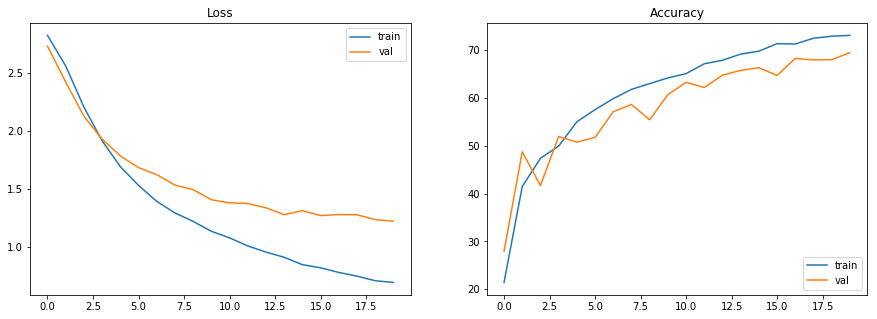

In [56]:
# Plot performance
trainer.plot_performance()

In [57]:
# Test performance
trainer.run_test_loop()
print("Test loss: {0:.2f}".format(trainer.train_state['test_loss']))
print("Test Accuracy: {0:.1f}%".format(trainer.train_state['test_acc']))

Test loss: 1.22
Test Accuracy: 67.6%


## Batch normalization

Even though we standardized our inputs to have zero mean and unit variance to aid with convergence, our inputs change during training as they go through the different layers and nonlinearities. This is known as internal covariate shirt and it slows down training and requires us to use smaller learning rates. The solution is [batch normalization](https://arxiv.org/abs/1502.03167) (batchnorm) which makes normalization a part of the model's architecture. This allows us to use much higher learning rates and get better performance, faster.

$ BN = \frac{a - \mu_{x}}{\sqrt{\sigma^2_{x} + \epsilon}}  * \gamma + \beta $

where:
* $a$ = activation | $\in \mathbb{R}^{NXH}$ ($N$ is the number of samples, $H$ is the hidden dim)
* $ \mu_{x}$ = mean of each hidden | $\in \mathbb{R}^{1XH}$
* $\sigma^2_{x}$ = variance of each hidden | $\in \mathbb{R}^{1XH}$
* $epsilon$ = noise
* $\gamma$ = scale parameter (learned parameter)
* $\beta$ = shift parameter (learned parameter)

But what does it mean for our activations to have zero mean and unit variance before the nonlinearity operation. It doesn't mean that the entire activation matrix has this property but instead batchnorm is applied on the hidden (num_output_channels in our case) dimension. So each hidden's mean and variance is calculated using all samples across the batch. Also, batchnorm uses the calcualted mean and variance of the activations in the batch during training. However, during test, the sample size could be skewed so the model uses the saved population mean and variance from training. PyTorch's [BatchNorm](https://pytorch.org/docs/stable/nn.html#torch.nn.BatchNorm1d) class takes care of all of this for us automatically.

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/batchnorm.png" width=400>

In [58]:
# Model with batch normalization
class SurnameModel_BN(nn.Module):
    def __init__(self, num_input_channels, num_output_channels, num_classes, dropout_p):
        super(SurnameModel_BN, self).__init__()
        
        # Conv weights
        self.conv = nn.ModuleList([nn.Conv1d(num_input_channels, num_output_channels, 
                                             kernel_size=f) for f in [2,3,4]])
        self.conv_bn = nn.ModuleList([nn.BatchNorm1d(num_output_channels) # define batchnorms
                                      for i in range(3)])
        self.dropout = nn.Dropout(dropout_p)
       
        # FC weights
        self.fc1 = nn.Linear(num_output_channels*3, num_classes)

    def forward(self, x, channel_first=False, apply_softmax=False):
        
        # Rearrange input so num_input_channels is in dim 1 (N, C, L)
        if not channel_first:
            x = x.transpose(1, 2)
            
        # Conv outputs
        z = [F.relu(conv_bn(conv(x))) for conv, conv_bn in zip(self.conv, self.conv_bn)]
        z = [F.max_pool1d(zz, zz.size(2)).squeeze(2) for zz in z]
        
        # Concat conv outputs
        z = torch.cat(z, 1)
        z = self.dropout(z)

        # FC layer
        y_pred = self.fc1(z)
        
        if apply_softmax:
            y_pred = F.softmax(y_pred, dim=1)
        return y_pred

In [59]:
# Initialization
dataset = SurnameDataset.load_dataset_and_make_vectorizer(split_df)
dataset.save_vectorizer(args.vectorizer_file)
vectorizer = dataset.vectorizer
model = SurnameModel_BN(num_input_channels=len(vectorizer.surname_vocab),
                        num_output_channels=args.num_filters,
                        num_classes=len(vectorizer.nationality_vocab),
                        dropout_p=args.dropout_p)
print (model.named_modules)

<bound method Module.named_modules of SurnameModel_BN(
  (conv): ModuleList(
    (0): Conv1d(28, 100, kernel_size=(2,), stride=(1,))
    (1): Conv1d(28, 100, kernel_size=(3,), stride=(1,))
    (2): Conv1d(28, 100, kernel_size=(4,), stride=(1,))
  )
  (conv_bn): ModuleList(
    (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (dropout): Dropout(p=0.1)
  (fc1): Linear(in_features=300, out_features=18, bias=True)
)>


In [60]:
# Train
trainer = Trainer(dataset=dataset, model=model, 
                  model_state_file=args.model_state_file, 
                  save_dir=args.save_dir, device=args.device,
                  shuffle=args.shuffle, num_epochs=args.num_epochs, 
                  batch_size=args.batch_size, learning_rate=args.learning_rate, 
                  early_stopping_criteria=args.early_stopping_criteria)
trainer.run_train_loop()

[EPOCH]: 0 | [LR]: 0.001 | [TRAIN LOSS]: 2.69 | [TRAIN ACC]: 23.5% | [VAL LOSS]: 2.34 | [VAL ACC]: 41.9%
[EPOCH]: 1 | [LR]: 0.001 | [TRAIN LOSS]: 2.06 | [TRAIN ACC]: 42.9% | [VAL LOSS]: 1.99 | [VAL ACC]: 41.7%
[EPOCH]: 2 | [LR]: 0.001 | [TRAIN LOSS]: 1.66 | [TRAIN ACC]: 50.6% | [VAL LOSS]: 1.74 | [VAL ACC]: 55.7%
[EPOCH]: 3 | [LR]: 0.001 | [TRAIN LOSS]: 1.41 | [TRAIN ACC]: 56.1% | [VAL LOSS]: 1.59 | [VAL ACC]: 54.9%
[EPOCH]: 4 | [LR]: 0.001 | [TRAIN LOSS]: 1.20 | [TRAIN ACC]: 59.2% | [VAL LOSS]: 1.51 | [VAL ACC]: 60.9%
[EPOCH]: 5 | [LR]: 0.001 | [TRAIN LOSS]: 1.08 | [TRAIN ACC]: 62.4% | [VAL LOSS]: 1.39 | [VAL ACC]: 57.7%
[EPOCH]: 6 | [LR]: 0.001 | [TRAIN LOSS]: 0.96 | [TRAIN ACC]: 64.7% | [VAL LOSS]: 1.39 | [VAL ACC]: 59.1%
[EPOCH]: 7 | [LR]: 0.001 | [TRAIN LOSS]: 0.90 | [TRAIN ACC]: 65.4% | [VAL LOSS]: 1.34 | [VAL ACC]: 61.6%
[EPOCH]: 8 | [LR]: 0.001 | [TRAIN LOSS]: 0.83 | [TRAIN ACC]: 68.8% | [VAL LOSS]: 1.33 | [VAL ACC]: 63.1%
[EPOCH]: 9 | [LR]: 0.001 | [TRAIN LOSS]: 0.76 | [TRAIN 

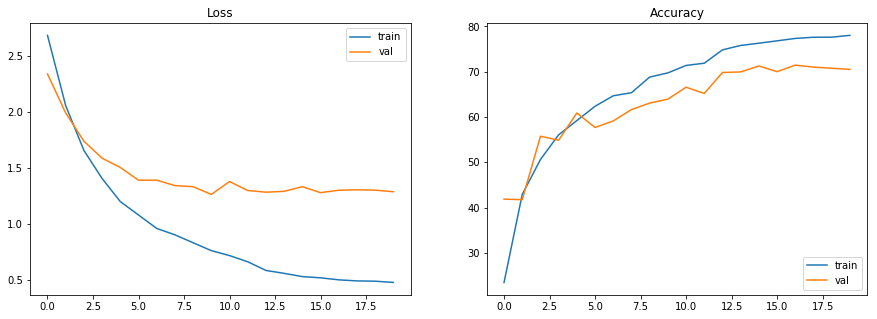

In [61]:
# Plot performance
trainer.plot_performance()